# Primera red convolucional para MNIST: LeNet

Como en la anterior práctica, primero importamos el conjunto de MNIST y lo normalizamos, pero sin convertir las imágenes en vectores unidimensionales 

In [2]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

training set (60000, 28, 28)
test set (10000, 28, 28)


#  LeNet

**LeNet (1998):** $\;$ CNN de Yann LeCun para MNIST

<div align="center">
<table><tr>
<td style="border: none;"><img src="LeNet.png" width=300/></td>
<td style="border: none;"><img src="Figure_14.15.png" width=800/></td>
</tr></table>
</div>

**Ejemplo:** $\;$ LeNet con terminación temprana (paciencia 2)

In [15]:
from keras import Sequential
from keras.layers import Input,Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()

model.add(Input((28,28,1)))
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(units=120, activation='tanh'))
model.add(Dense(units=84, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_4 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

El summary del modelo nos lista las diferentes capas del mismo así como su número de parámetros.

In [18]:
keras.utils.plot_model(model, to_file="model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compilar el modelo

In [24]:
from keras.optimizers import SGD

sgd=SGD(learning_rate=0.1)

# Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])s


In [26]:
batch_size=32
epochs=25

H = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0296 - val_accuracy: 0.9904
Epoch 2/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0308 - val_accuracy: 0.9901
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0305 - val_accuracy: 0.9901
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0310 - val_accuracy: 0.9901
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 9.5708e-04 - accuracy: 0.9999 - val_loss: 0.0317 - val_accuracy: 0.9904
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 8.9065e-04 - accuracy: 0.9999 - val_loss: 0.0310 - val_accuracy: 0.9906
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 7.9658e-04 - accuracy: 0.9999 - val_loss: 0.0332 - v

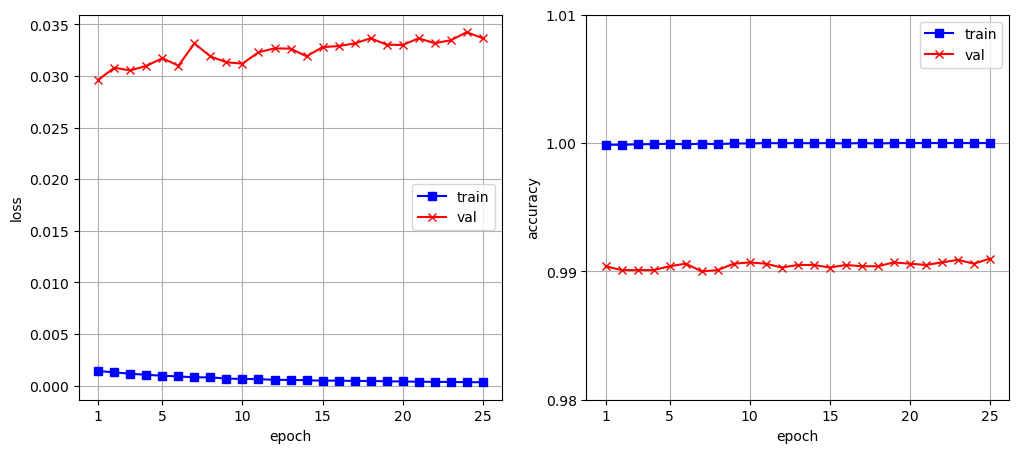

In [34]:
import numpy as np; import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
xx = np.arange(1, len(H.history['loss'])+1)
xticks = np.concatenate((np.array([1]), np.arange(5, len(H.history['loss'])+1, 5)))
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss');
ax.set_xticks(xticks)
ax.plot(xx, H.history['loss'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_loss'], color='r', marker='x', label='val'); ax.legend()
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xticks); ax.set_yticks(np.arange(.98, 1.01, .01)); ax.set_ylim([.98, 1.01])
ax.plot(xx, H.history['accuracy'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_accuracy'], color='r', marker='x', label='val'); ax.legend();